<a href="https://colab.research.google.com/github/ozyeon/DataTranslator_2022_w3/blob/main/SC_W2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.metrics import classification_report

sms = pd.read_csv("sms.csv")
sms.info()
sms.isnull().mean()

scaled = MinMaxScaler().fit_transform(sms.drop("type", axis=1))

X_train, X_test, y_train, y_test = train_test_split(
    scaled, sms.type, test_size = 0.2
)

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
print("model dt :", model_dt.score(X_test, y_test))

model_rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print("model rf :", model_rf.score(X_test, y_test))

model_knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)
print("model knn :", model_knn.score(X_test, y_test))

model_svm = SVC().fit(X_train, y_train)
print("model svm :", model_svm.score(X_test, y_test))

print("\n", classification_report(model_dt.predict(X_test), y_test))
print("\n", classification_report(model_rf.predict(X_test), y_test))
print("\n", classification_report(model_knn.predict(X_test), y_test))
print("\n", classification_report(model_svm.predict(X_test), y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 222 entries, type to wan
dtypes: int64(222)
memory usage: 9.4 MB
model dt : 0.9336322869955157
model rf : 0.9309417040358744
model knn : 0.9013452914798207
model svm : 0.9237668161434978

               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1006
           1       0.61      0.86      0.72       109

    accuracy                           0.93      1115
   macro avg       0.80      0.90      0.84      1115
weighted avg       0.95      0.93      0.94      1115


               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1003
           1       0.61      0.84      0.71       112

    accuracy                           0.93      1115
   macro avg       0.80      0.89      0.84      1115
weighted avg       0.94      0.93      0.94      1115


               precision    recall  f1-score   support

           0   

위 상황에서의 문제점:
1. 0이 많다
2. 메모리를 너무 많이 잡아먹는다
-> 해결방법
  - encoding
  - embedding(수치화)
    - nn개의 변수
    - nn개의 수치 좌표
    - 0이 아닌 의미가 있는 숫자들로만의 표현

# 다양한 파라미터로 분류 모형 적용

* 모형
  - 파라미터
  - 하이퍼 파라미터
    - search -> grid search / random search

* grid: 하나씩 모두 탐색함
  - CV(Cross Validation): train / test 파티셔닝을 여러번 반복하며 성능 비교

- 필요 라이브러리 호출

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, datasets

from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV    # 긴 시간이 걸릴 수 있음

import re
import numpy as np
import pandas as pd


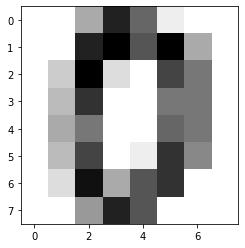

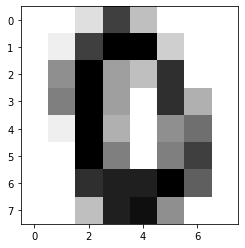

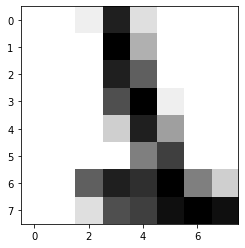

In [ ]:
#MNIST 데이터셋
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

digits = load_digits()
digits.data.shape
X, y = digits.data, digits.target

#시각화
plt.imshow(digits.data[0,:].reshape(8,8), cmap=plt.cm.binary)
plt.show()

plt.imshow(digits.data[150,:].reshape(8,8), cmap=plt.cm.binary)
plt.show()

plt.imshow(digits.data[1000,:].reshape(8,8), cmap=plt.cm.binary)
plt.show()

- train.csv와 test.csv를 읽으셔서,  KNN, NB. DT, RF 적용해보세요.
- 1열이 target, 2~785열이 X입니다.

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_train = train_data.iloc[:, 1:785 ]
y_train  = train_data.iloc[:, 0 ]

X_test = test_data.iloc[:, 1:785 ]
y_test  = test_data.iloc[:, 0 ]


In [ ]:
#적용
#NB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print('NB', np.mean(predicted == y_test))

#DT
dt1 = tree.DecisionTreeClassifier().fit(X_train, y_train)
pred = dt1.predict( X_test)
print('DT', np.mean( pred == y_test ))

#RF
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
predicted = rf.predict(X_test)
print('RF', np.mean( predicted == y_test ))

#KNN
knn = neighbors.KNeighborsClassifier().fit(X_train, y_train)
predicted = knn.predict(X_test)
print('KNN', np.mean( predicted == y_test ))

#SVM
svm = SVC().fit(X_train, y_train)
predicted = svm.predict(X_test)
print('SVM', np.mean( predicted == y_test ))

NB 0.813
DT 0.775
RF 0.94
KNN 0.945
SVM 0.961


- Grid Search 적용

In [14]:
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}    # 다양한 파라미터 조합에서 최적의 성능 찾기
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())
print(clf.best_score_)
print(clf.best_params_,"\n")

#Grid Search for NB
nb =MultinomialNB()
nb.get_params().keys()

parameters = {'alpha': (1e-2, 1e-3, 1e-4)}    # 다양한 파라미터 조합에서 최적의 성능 찾기

gs_clf = GridSearchCV(nb, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(iris.data, iris.target)

print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.9800000000000001
{'C': 1, 'kernel': 'linear'} 

0.9533333333333334
{'alpha': 0.01}


- Validation Curve 이용

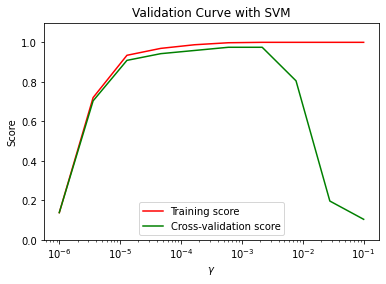

In [ ]:
#Validation Curve
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 10)

digits = load_digits()
digits.data.shape
X, y = digits.data, digits.target

train_scores, test_scores = \
    validation_curve(SVC(), X, y, 
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#결과 시각화
import matplotlib.pyplot as plt
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()


- Grid Search CV

In [ ]:
#grid search cv
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=1)

%time gs = gs.fit(X, y)
gs.best_score_
gs.best_params_
gs.best_estimator_


gs.cv_results_["mean_test_score"]
gs.cv_results_["params"]

print(gs.best_score_)
print(gs.best_params_)
#10분+ 소요


- Parameter Grid

In [ ]:
#parameter grid
from sklearn.model_selection import ParameterGrid
param_grid = {'a': [1, 2], 'b': [True, False]}
list(ParameterGrid(param_grid))


param_grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1, 10]}]
list(ParameterGrid(param_grid))

#parallel processing
param_grid = {"gamma": np.logspace(-6, -1, 10)}
gs1 = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
gs2 = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=2)

gs1.fit(X, y)
gs2.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

# ANN 이해

1. 은닉층 多 -> 변환 多
2. 은닉층 內 노드의 수 -> 차원
3. 은닉층 구조 + prarmeter -> search
  * search
    - random search: 가장 많이 쓰는 방법
    - grid search: 별로 좋은 방법은 아님, 제한적임 => 안씀!

* 값의 개수 -> 은닉층의 수
* 각 값 -> 각 은닉층 노드의 수

In [ ]:
# Artificial Neural Network, 인공신경망
from sklearn.neural_network import MLPClassifier

X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]

clf = MLPClassifier(hidden_layer_sizes=(5, 2))
clf.fit(X, y)
clf.coefs_[0] #입력층과 은닉층 사이 가중치
clf.coefs_[1] #은닉층1과 은닉층2사이 가중치

result = clf.predict([[0, 0], [0, 1], 
                      [1, 0], [0, 1], 
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])

prob_results = clf.predict_proba([[0, 0], [0, 1], 
                                  [1, 0], [0, 1], 
                                  [1, 1], [2., 2.], 
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)
result


[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


array([0, 0, 0, 0, 1, 1, 1, 1])

* creditset.csv에 대해서 income, age, loan을 x변수 default10yr를 y
* x변수는 scaled
* 8:2로 파티셔닝
* MLPClassifier로 피팅: hidden_layer_sizes는 (6:3)으로 지정
* test셋으로 성능을 평가하세요
* 은닉층 구조를 바꿔서 해보세요
* svm과 비교해보세요

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

credit = pd.read_csv("creditset.csv", index_col=0)
scaled = MinMaxScaler().fit_transform(credit[["income","age","loan"]])
X_train, X_test, y_train, y_test = train_test_split(
    scaled, credit.default10yr, test_size = 0.2
)

model_mlp = MLPClassifier(hidden_layer_sizes=(12,6,3)).fit(X_train, y_train)
print("model mlp :", model_mlp.score(X_test, y_test))

model_svm = SVC().fit(X_train, y_train)
print("model svm :", model_svm.score(X_test, y_test))

print("\n", classification_report(model_mlp.predict(X_test), y_test))
print("\n", classification_report(model_svm.predict(X_test), y_test))

model mlp : 0.98
model svm : 0.985

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       346
           1       0.91      0.94      0.93        54

    accuracy                           0.98       400
   macro avg       0.95      0.96      0.96       400
weighted avg       0.98      0.98      0.98       400


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       344
           1       0.95      0.95      0.95        56

    accuracy                           0.98       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.98      0.98       400



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [20]:
model_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (12, 6, 3),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [4]:
#creditset.csv에 적용
csv_data = pd.read_csv("creditset.csv")
csv_data = csv_data.values
csv_data.shape
X = csv_data[:, 1:4 ]
y  = csv_data[:, 5 ]

#Partitioning
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )



In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

mlp.coefs_
mlp.coefs_[0]
mlp.intercepts_[0]

np.mean( predictions == y_test )



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,predictions)
classification_report(y_test,predictions)

- sms.csv에 대해서 MLPClassifier 적용해보세요.